# **Experiment**: full algorithm of concent from smudged ground truth 4.1

In [1]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentC3.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentC3.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

In [2]:
# Experiment parameters
vol_smudge = 10
# img_size = 129  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 2 # number of times mesh refinement
snr = 1 / 16  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 2048 # 5000  # [512, 1024, 2048, 4096, 8192]

# tau1 = 5e-9
# tau2 = 1e-1 * tau1
# tau2 = 1e-9 * tau1
# tau2 = 1e-1 * tau1 / (129**4)
J0 = 6

# durations
# SNR16_L129_N8192_J6_r2_sX_i3 -> 10h
# SNR16_L129_N8192_J6_r1_sX_i3 -> 1.5h
# SNR16_L129_N2048_J6_r2_sX_i5 -> per iter: 1h data_discr/2min rest | tot: 5h20m
max_iter = 20

# Directly start experiment
exp = Exp()

exp.begin(prefix="expC3" , postfix="SNR{}_N{}_J{}_r{}_s{}_i{}".format(int(1/snr), num_imgs, J0, mr_repeat, vol_smudge, max_iter))
# exp.begin(prefix="expC3" , postfix="SNR{}_L{}_N{}_J{}_r{}_s{}_i{}_t{}_tt{}".format(int(1/snr), img_size, num_imgs, J0, mr_repeat, vol_smudge, max_iter, int(-np.log(tau1)/np.log(10)), int(-np.log(tau2)/np.log(10)) ))
exp.dbglevel(4)

2022-03-16 19:49:06,185 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expC3_22-03-16_19-49-06_SNR16_N2048_J6_r2_s10_i20


In [3]:
# Set data path
data_dir = "data"
# data_filename = "clean70SRibosome_vol_65p.mrc"
data_filename = "waving_spike_state22_91p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
results_dir = "results"
results_folder = "expC3_22-03-01_22-57-37_SNR16_L129_N2048_J6_r2_s10_i10"  # ribosomal 70s
results_folder = "expC3_22-03-15_11-29-31_SNR16_N2048_J6_r2_s10_i2"  # spike protein
results_folder = "expC3_22-03-15_13-53-40_SNR16_N2048_J6_r2_s10_i20"  # spike protein
results_path = os.path.join("..", "..", "..", "..",results_dir,results_folder)

In [4]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               max_iter=max_iter,
               num_imgs=num_imgs,
               snr=snr,
               mr_repeat=mr_repeat,
               J0=J0,
               data_path=data_path,
               vol_smudge=vol_smudge,
               )

2022-03-16 19:49:06,202 INFO Start Experiment
2022-03-16 19:49:06,204 INFO Running Experiment for SNR = 0.0625 and 2048 images
2022-03-16 19:49:06,205 INFO This experiment illustrates orientation refinement using a lifting approach
2022-03-16 19:49:06,206 INFO Initialize simulation object and CTF filters.
2022-03-16 19:49:06,222 INFO Load 3D map and downsample 3D map to desired grids of 91 x 91 x 91.
2022-03-16 19:49:06,338 INFO Use downsampled map to creat simulation object.
2022-03-16 19:49:06,395 INFO Get true rotation angles generated randomly by the simulation object.
2022-03-16 19:49:08,145 INFO Trying NFFT backend finufft
2022-03-16 19:49:08,206 INFO NFFT backend finufft usable.
2022-03-16 19:49:08,208 INFO Trying NFFT backend cufinufft
2022-03-16 19:49:08,211 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2022-03-16 19:49:08,212 INFO Trying NFFT backend pynfft
2022-03-16 19:49:08,213 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2022-03-16 19

2022-03-16 20:07:43,573 INFO Computing data fidelity for 114564 rotations and 2048 images at 59%
2022-03-16 20:07:58,889 INFO Computing data fidelity for 114564 rotations and 2048 images at 60%
2022-03-16 20:08:13,820 INFO Computing data fidelity for 114564 rotations and 2048 images at 61%
2022-03-16 20:08:28,871 INFO Computing data fidelity for 114564 rotations and 2048 images at 62%
2022-03-16 20:08:43,848 INFO Computing data fidelity for 114564 rotations and 2048 images at 63%
2022-03-16 20:08:58,690 INFO Computing data fidelity for 114564 rotations and 2048 images at 64%
2022-03-16 20:09:13,428 INFO Computing data fidelity for 114564 rotations and 2048 images at 65%
2022-03-16 20:09:28,360 INFO Computing data fidelity for 114564 rotations and 2048 images at 66%
2022-03-16 20:09:43,478 INFO Computing data fidelity for 114564 rotations and 2048 images at 67%
2022-03-16 20:09:58,357 INFO Computing data fidelity for 114564 rotations and 2048 images at 67%
2022-03-16 20:10:13,326 INFO C

2022-03-16 20:19:54,491 INFO Computing 50 means of 327 points in at most 20 steps...
2022-03-16 20:19:54,539 INFO Computing 2048 means at 7%
2022-03-16 20:19:54,619 INFO Computing 50 means of 319 points in at most 20 steps...
2022-03-16 20:19:54,662 INFO Computing 2048 means at 9%
2022-03-16 20:19:54,746 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-16 20:19:54,791 INFO Computing 2048 means at 12%
2022-03-16 20:19:54,874 INFO Computing 50 means of 327 points in at most 20 steps...
2022-03-16 20:19:54,916 INFO Computing 2048 means at 14%
2022-03-16 20:19:55,000 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-16 20:19:55,041 INFO Computing 2048 means at 17%
2022-03-16 20:19:55,125 INFO Computing 50 means of 317 points in at most 20 steps...
2022-03-16 20:19:55,169 INFO Computing 2048 means at 19%
2022-03-16 20:19:55,253 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-16 20:19:55,297 INFO Computing 2048 means at 21%
2022-03-

2022-03-16 20:25:36,753 INFO Computing data fidelity for 114564 rotations and 2048 images at 17%
2022-03-16 20:25:51,645 INFO Computing data fidelity for 114564 rotations and 2048 images at 18%
2022-03-16 20:26:06,625 INFO Computing data fidelity for 114564 rotations and 2048 images at 19%
2022-03-16 20:26:21,914 INFO Computing data fidelity for 114564 rotations and 2048 images at 20%
2022-03-16 20:26:36,729 INFO Computing data fidelity for 114564 rotations and 2048 images at 21%
2022-03-16 20:26:51,764 INFO Computing data fidelity for 114564 rotations and 2048 images at 22%
2022-03-16 20:27:06,871 INFO Computing data fidelity for 114564 rotations and 2048 images at 23%
2022-03-16 20:27:22,166 INFO Computing data fidelity for 114564 rotations and 2048 images at 24%
2022-03-16 20:27:37,061 INFO Computing data fidelity for 114564 rotations and 2048 images at 25%
2022-03-16 20:27:52,076 INFO Computing data fidelity for 114564 rotations and 2048 images at 25%
2022-03-16 20:28:06,761 INFO C

2022-03-16 20:47:23,228 INFO Computing data fidelity for 114564 rotations and 2048 images at 93%
2022-03-16 20:47:38,737 INFO Computing data fidelity for 114564 rotations and 2048 images at 94%
2022-03-16 20:47:54,239 INFO Computing data fidelity for 114564 rotations and 2048 images at 95%
2022-03-16 20:48:09,711 INFO Computing data fidelity for 114564 rotations and 2048 images at 96%
2022-03-16 20:48:25,268 INFO Computing data fidelity for 114564 rotations and 2048 images at 97%
2022-03-16 20:48:40,597 INFO Computing data fidelity for 114564 rotations and 2048 images at 98%
2022-03-16 20:48:56,054 INFO Computing data fidelity for 114564 rotations and 2048 images at 99%
2022-03-16 20:49:09,333 INFO Computing data fidelity for 114564 rotations and 2048 images at 100%
2022-03-16 20:49:12,310 INFO Do lambda update step
lambda = [2.33694137 3.30995062 2.90028223 ... 1.60458811 1.08642059 1.14789079]
2022-03-16 20:49:38,217 INFO Do rots update step
2022-03-16 20:49:39,254 INFO Projecting 20

2022-03-16 20:50:15,298 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-16 20:50:15,346 INFO Computing 2048 means at 70%
2022-03-16 20:50:15,432 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-16 20:50:15,489 INFO Computing 2048 means at 73%
2022-03-16 20:50:15,598 INFO Computing 50 means of 319 points in at most 20 steps...
2022-03-16 20:50:15,643 INFO Computing 2048 means at 75%
2022-03-16 20:50:15,728 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-16 20:50:15,774 INFO Computing 2048 means at 78%
2022-03-16 20:50:15,861 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-16 20:50:15,918 INFO Computing 2048 means at 80%
2022-03-16 20:50:16,005 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-16 20:50:16,069 INFO Computing 2048 means at 83%
2022-03-16 20:50:16,158 INFO Computing 50 means of 322 points in at most 20 steps...
2022-03-16 20:50:16,209 INFO Computing 2048 means at 85%
2022-0

2022-03-16 21:05:32,759 INFO Computing data fidelity for 114564 rotations and 2048 images at 51%
2022-03-16 21:05:47,716 INFO Computing data fidelity for 114564 rotations and 2048 images at 52%
2022-03-16 21:06:02,343 INFO Computing data fidelity for 114564 rotations and 2048 images at 53%
2022-03-16 21:06:17,169 INFO Computing data fidelity for 114564 rotations and 2048 images at 54%
2022-03-16 21:06:32,347 INFO Computing data fidelity for 114564 rotations and 2048 images at 55%
2022-03-16 21:06:47,659 INFO Computing data fidelity for 114564 rotations and 2048 images at 56%
2022-03-16 21:07:02,399 INFO Computing data fidelity for 114564 rotations and 2048 images at 57%
2022-03-16 21:07:17,417 INFO Computing data fidelity for 114564 rotations and 2048 images at 58%
2022-03-16 21:07:32,453 INFO Computing data fidelity for 114564 rotations and 2048 images at 58%
2022-03-16 21:07:47,378 INFO Computing data fidelity for 114564 rotations and 2048 images at 59%
2022-03-16 21:08:02,621 INFO C

2022-03-16 21:20:22,978 INFO Projecting 2048 vectors onto 114564-simplex at 85%
2022-03-16 21:20:23,660 INFO Projecting 2048 vectors onto 114564-simplex at 87%
2022-03-16 21:20:24,322 INFO Projecting 2048 vectors onto 114564-simplex at 90%
2022-03-16 21:20:25,047 INFO Projecting 2048 vectors onto 114564-simplex at 92%
2022-03-16 21:20:25,740 INFO Projecting 2048 vectors onto 114564-simplex at 95%
2022-03-16 21:20:26,391 INFO Projecting 2048 vectors onto 114564-simplex at 97%
2022-03-16 21:20:27,054 INFO Projecting 2048 vectors onto 114564-simplex at 100%
2022-03-16 21:20:28,418 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-16 21:20:28,476 INFO Computing 2048 means at 2%
2022-03-16 21:20:28,559 INFO Computing 50 means of 322 points in at most 20 steps...
2022-03-16 21:20:28,604 INFO Computing 2048 means at 4%
2022-03-16 21:20:28,682 INFO Computing 50 means of 329 points in at most 20 steps...
2022-03-16 21:20:28,733 INFO Computing 2048 means at 7%
2022-03-16 21:20

2022-03-16 21:23:54,275 INFO Computing data fidelity for 114564 rotations and 2048 images at 9%
2022-03-16 21:24:09,763 INFO Computing data fidelity for 114564 rotations and 2048 images at 10%
2022-03-16 21:24:24,451 INFO Computing data fidelity for 114564 rotations and 2048 images at 11%
2022-03-16 21:24:38,908 INFO Computing data fidelity for 114564 rotations and 2048 images at 12%
2022-03-16 21:24:53,385 INFO Computing data fidelity for 114564 rotations and 2048 images at 13%
2022-03-16 21:25:08,338 INFO Computing data fidelity for 114564 rotations and 2048 images at 14%
2022-03-16 21:25:25,156 INFO Computing data fidelity for 114564 rotations and 2048 images at 15%
2022-03-16 21:25:41,705 INFO Computing data fidelity for 114564 rotations and 2048 images at 16%
2022-03-16 21:25:57,988 INFO Computing data fidelity for 114564 rotations and 2048 images at 16%
2022-03-16 21:26:14,710 INFO Computing data fidelity for 114564 rotations and 2048 images at 17%
2022-03-16 21:26:31,269 INFO Co

2022-03-16 21:44:53,866 INFO Computing data fidelity for 114564 rotations and 2048 images at 85%
2022-03-16 21:45:08,253 INFO Computing data fidelity for 114564 rotations and 2048 images at 86%
2022-03-16 21:45:22,611 INFO Computing data fidelity for 114564 rotations and 2048 images at 87%
2022-03-16 21:45:36,877 INFO Computing data fidelity for 114564 rotations and 2048 images at 88%
2022-03-16 21:45:51,126 INFO Computing data fidelity for 114564 rotations and 2048 images at 89%
2022-03-16 21:46:05,280 INFO Computing data fidelity for 114564 rotations and 2048 images at 90%
2022-03-16 21:46:19,610 INFO Computing data fidelity for 114564 rotations and 2048 images at 91%
2022-03-16 21:46:34,880 INFO Computing data fidelity for 114564 rotations and 2048 images at 92%
2022-03-16 21:46:49,926 INFO Computing data fidelity for 114564 rotations and 2048 images at 92%
2022-03-16 21:47:04,335 INFO Computing data fidelity for 114564 rotations and 2048 images at 93%
2022-03-16 21:47:18,648 INFO C

2022-03-16 21:49:38,358 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-16 21:49:38,400 INFO Computing 2048 means at 56%
2022-03-16 21:49:38,477 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-16 21:49:38,517 INFO Computing 2048 means at 58%
2022-03-16 21:49:38,595 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-16 21:49:38,641 INFO Computing 2048 means at 61%
2022-03-16 21:49:38,726 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-16 21:49:38,769 INFO Computing 2048 means at 63%
2022-03-16 21:49:38,851 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-16 21:49:38,894 INFO Computing 2048 means at 65%
2022-03-16 21:49:38,973 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-16 21:49:39,017 INFO Computing 2048 means at 68%
2022-03-16 21:49:39,095 INFO Computing 50 means of 322 points in at most 20 steps...
2022-03-16 21:49:39,138 INFO Computing 2048 means at 70%
2022-0

2022-03-16 22:01:44,399 INFO Computing data fidelity for 114564 rotations and 2048 images at 43%
2022-03-16 22:01:58,525 INFO Computing data fidelity for 114564 rotations and 2048 images at 44%
2022-03-16 22:02:12,663 INFO Computing data fidelity for 114564 rotations and 2048 images at 45%
2022-03-16 22:02:26,825 INFO Computing data fidelity for 114564 rotations and 2048 images at 46%
2022-03-16 22:02:40,845 INFO Computing data fidelity for 114564 rotations and 2048 images at 47%
2022-03-16 22:02:54,949 INFO Computing data fidelity for 114564 rotations and 2048 images at 48%
2022-03-16 22:03:09,098 INFO Computing data fidelity for 114564 rotations and 2048 images at 49%
2022-03-16 22:03:23,203 INFO Computing data fidelity for 114564 rotations and 2048 images at 50%
2022-03-16 22:03:37,484 INFO Computing data fidelity for 114564 rotations and 2048 images at 50%
2022-03-16 22:03:51,517 INFO Computing data fidelity for 114564 rotations and 2048 images at 51%
2022-03-16 22:04:06,004 INFO C

2022-03-16 22:17:16,832 INFO Projecting 2048 vectors onto 114564-simplex at 58%
2022-03-16 22:17:17,450 INFO Projecting 2048 vectors onto 114564-simplex at 61%
2022-03-16 22:17:18,088 INFO Projecting 2048 vectors onto 114564-simplex at 63%
2022-03-16 22:17:18,698 INFO Projecting 2048 vectors onto 114564-simplex at 65%
2022-03-16 22:17:19,317 INFO Projecting 2048 vectors onto 114564-simplex at 68%
2022-03-16 22:17:19,920 INFO Projecting 2048 vectors onto 114564-simplex at 70%
2022-03-16 22:17:20,549 INFO Projecting 2048 vectors onto 114564-simplex at 73%
2022-03-16 22:17:21,351 INFO Projecting 2048 vectors onto 114564-simplex at 75%
2022-03-16 22:17:21,973 INFO Projecting 2048 vectors onto 114564-simplex at 78%
2022-03-16 22:17:22,593 INFO Projecting 2048 vectors onto 114564-simplex at 80%
2022-03-16 22:17:23,245 INFO Projecting 2048 vectors onto 114564-simplex at 83%
2022-03-16 22:17:23,863 INFO Projecting 2048 vectors onto 114564-simplex at 85%
2022-03-16 22:17:24,490 INFO Projecting 

2022-03-16 22:18:38,012 INFO Computing data fidelity for 114564 rotations and 2048 images at 1%
2022-03-16 22:18:53,208 INFO Computing data fidelity for 114564 rotations and 2048 images at 2%
2022-03-16 22:19:08,726 INFO Computing data fidelity for 114564 rotations and 2048 images at 3%
2022-03-16 22:19:22,800 INFO Computing data fidelity for 114564 rotations and 2048 images at 4%
2022-03-16 22:19:37,728 INFO Computing data fidelity for 114564 rotations and 2048 images at 5%
2022-03-16 22:19:52,057 INFO Computing data fidelity for 114564 rotations and 2048 images at 6%
2022-03-16 22:20:05,975 INFO Computing data fidelity for 114564 rotations and 2048 images at 7%
2022-03-16 22:20:19,984 INFO Computing data fidelity for 114564 rotations and 2048 images at 8%
2022-03-16 22:20:33,963 INFO Computing data fidelity for 114564 rotations and 2048 images at 8%
2022-03-16 22:20:48,007 INFO Computing data fidelity for 114564 rotations and 2048 images at 9%
2022-03-16 22:21:02,093 INFO Computing d

2022-03-16 22:38:48,912 INFO Computing data fidelity for 114564 rotations and 2048 images at 77%
2022-03-16 22:39:02,989 INFO Computing data fidelity for 114564 rotations and 2048 images at 78%
2022-03-16 22:39:17,187 INFO Computing data fidelity for 114564 rotations and 2048 images at 79%
2022-03-16 22:39:31,344 INFO Computing data fidelity for 114564 rotations and 2048 images at 80%
2022-03-16 22:39:45,537 INFO Computing data fidelity for 114564 rotations and 2048 images at 81%
2022-03-16 22:39:59,656 INFO Computing data fidelity for 114564 rotations and 2048 images at 82%
2022-03-16 22:40:14,522 INFO Computing data fidelity for 114564 rotations and 2048 images at 83%
2022-03-16 22:40:28,545 INFO Computing data fidelity for 114564 rotations and 2048 images at 84%
2022-03-16 22:40:42,831 INFO Computing data fidelity for 114564 rotations and 2048 images at 84%
2022-03-16 22:40:57,547 INFO Computing data fidelity for 114564 rotations and 2048 images at 85%
2022-03-16 22:41:12,177 INFO C

2022-03-16 22:45:42,527 INFO Computing 2048 means at 39%
2022-03-16 22:45:42,619 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-16 22:45:42,678 INFO Computing 2048 means at 41%
2022-03-16 22:45:42,777 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-16 22:45:42,839 INFO Computing 2048 means at 43%
2022-03-16 22:45:42,926 INFO Computing 50 means of 317 points in at most 20 steps...
2022-03-16 22:45:42,979 INFO Computing 2048 means at 46%
2022-03-16 22:45:43,070 INFO Computing 50 means of 321 points in at most 20 steps...
2022-03-16 22:45:43,126 INFO Computing 2048 means at 48%
2022-03-16 22:45:43,225 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-16 22:45:43,278 INFO Computing 2048 means at 51%
2022-03-16 22:45:43,365 INFO Computing 50 means of 323 points in at most 20 steps...
2022-03-16 22:45:43,414 INFO Computing 2048 means at 53%
2022-03-16 22:45:43,499 INFO Computing 50 means of 317 points in at most 20 steps...
2022-0

2022-03-16 22:55:41,907 INFO Computing data fidelity for 114564 rotations and 2048 images at 34%
2022-03-16 22:55:55,845 INFO Computing data fidelity for 114564 rotations and 2048 images at 35%
2022-03-16 22:56:09,784 INFO Computing data fidelity for 114564 rotations and 2048 images at 36%
2022-03-16 22:56:23,751 INFO Computing data fidelity for 114564 rotations and 2048 images at 37%
2022-03-16 22:56:38,303 INFO Computing data fidelity for 114564 rotations and 2048 images at 38%
2022-03-16 22:56:52,141 INFO Computing data fidelity for 114564 rotations and 2048 images at 39%
2022-03-16 22:57:06,087 INFO Computing data fidelity for 114564 rotations and 2048 images at 40%
2022-03-16 22:57:20,021 INFO Computing data fidelity for 114564 rotations and 2048 images at 41%
2022-03-16 22:57:34,070 INFO Computing data fidelity for 114564 rotations and 2048 images at 42%
2022-03-16 22:57:48,008 INFO Computing data fidelity for 114564 rotations and 2048 images at 42%
2022-03-16 22:58:01,788 INFO C

2022-03-16 23:13:21,725 INFO Projecting 2048 vectors onto 114564-simplex at 29%
2022-03-16 23:13:22,424 INFO Projecting 2048 vectors onto 114564-simplex at 31%
2022-03-16 23:13:23,110 INFO Projecting 2048 vectors onto 114564-simplex at 34%
2022-03-16 23:13:23,804 INFO Projecting 2048 vectors onto 114564-simplex at 36%
2022-03-16 23:13:24,502 INFO Projecting 2048 vectors onto 114564-simplex at 39%
2022-03-16 23:13:25,209 INFO Projecting 2048 vectors onto 114564-simplex at 41%
2022-03-16 23:13:25,899 INFO Projecting 2048 vectors onto 114564-simplex at 43%
2022-03-16 23:13:26,594 INFO Projecting 2048 vectors onto 114564-simplex at 46%
2022-03-16 23:13:27,327 INFO Projecting 2048 vectors onto 114564-simplex at 48%
2022-03-16 23:13:28,229 INFO Projecting 2048 vectors onto 114564-simplex at 51%
2022-03-16 23:13:28,927 INFO Projecting 2048 vectors onto 114564-simplex at 53%
2022-03-16 23:13:29,622 INFO Projecting 2048 vectors onto 114564-simplex at 56%
2022-03-16 23:13:30,304 INFO Projecting 

2022-03-16 23:13:52,697 INFO Do vol update step
2022-03-16 23:13:52,698 INFO Compute adjoint forward mapping on the images
2022-03-16 23:13:56,746 INFO Determined adjoint mappings. Shape = (91, 91, 91)
2022-03-16 23:13:56,762 INFO Computing adjoint forward mappings from 2048 rotations at 50%
2022-03-16 23:14:00,736 INFO Determined adjoint mappings. Shape = (91, 91, 91)
2022-03-16 23:14:00,747 INFO Computing adjoint forward mappings from 2048 rotations at 100%
2022-03-16 23:14:07,583 INFO Computing kernel from 2048 rotations at 50%
2022-03-16 23:14:14,603 INFO Computing kernel from 2048 rotations at 100%
2022-03-16 23:14:14,605 INFO Computing non-centered Fourier Transform
2022-03-16 23:14:14,779 INFO Add ramp filter regularisation
========================= Iteration 8 =========================
2022-03-16 23:14:19,810 INFO Update data_discrepancies
2022-03-16 23:14:19,811 INFO Computing \|Ag.u - f_i\|^2
2022-03-16 23:14:36,020 INFO Computing data fidelity for 114564 rotations and 2048 i

2022-03-16 23:32:32,889 INFO Computing data fidelity for 114564 rotations and 2048 images at 68%
2022-03-16 23:32:47,054 INFO Computing data fidelity for 114564 rotations and 2048 images at 69%
2022-03-16 23:33:01,097 INFO Computing data fidelity for 114564 rotations and 2048 images at 70%
2022-03-16 23:33:15,078 INFO Computing data fidelity for 114564 rotations and 2048 images at 71%
2022-03-16 23:33:29,116 INFO Computing data fidelity for 114564 rotations and 2048 images at 72%
2022-03-16 23:33:43,172 INFO Computing data fidelity for 114564 rotations and 2048 images at 73%
2022-03-16 23:33:57,146 INFO Computing data fidelity for 114564 rotations and 2048 images at 74%
2022-03-16 23:34:11,144 INFO Computing data fidelity for 114564 rotations and 2048 images at 75%
2022-03-16 23:34:25,240 INFO Computing data fidelity for 114564 rotations and 2048 images at 75%
2022-03-16 23:34:39,249 INFO Computing data fidelity for 114564 rotations and 2048 images at 76%
2022-03-16 23:34:53,406 INFO C

2022-03-16 23:41:50,528 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-16 23:41:50,574 INFO Computing 2048 means at 24%
2022-03-16 23:41:50,684 INFO Computing 50 means of 327 points in at most 20 steps...
2022-03-16 23:41:50,742 INFO Computing 2048 means at 26%
2022-03-16 23:41:50,827 INFO Computing 50 means of 317 points in at most 20 steps...
2022-03-16 23:41:50,872 INFO Computing 2048 means at 29%
2022-03-16 23:41:50,956 INFO Computing 50 means of 327 points in at most 20 steps...
2022-03-16 23:41:51,001 INFO Computing 2048 means at 31%
2022-03-16 23:41:51,089 INFO Computing 50 means of 330 points in at most 20 steps...
2022-03-16 23:41:51,139 INFO Computing 2048 means at 34%
2022-03-16 23:41:51,222 INFO Computing 50 means of 329 points in at most 20 steps...
2022-03-16 23:41:51,265 INFO Computing 2048 means at 36%
2022-03-16 23:41:51,349 INFO Computing 50 means of 330 points in at most 20 steps...
2022-03-16 23:41:51,391 INFO Computing 2048 means at 39%
2022-0

2022-03-16 23:49:41,901 INFO Computing data fidelity for 114564 rotations and 2048 images at 26%
2022-03-16 23:49:56,973 INFO Computing data fidelity for 114564 rotations and 2048 images at 27%
2022-03-16 23:50:11,409 INFO Computing data fidelity for 114564 rotations and 2048 images at 28%
2022-03-16 23:50:25,511 INFO Computing data fidelity for 114564 rotations and 2048 images at 29%
2022-03-16 23:50:39,766 INFO Computing data fidelity for 114564 rotations and 2048 images at 30%
2022-03-16 23:50:53,817 INFO Computing data fidelity for 114564 rotations and 2048 images at 31%
2022-03-16 23:51:08,071 INFO Computing data fidelity for 114564 rotations and 2048 images at 32%
2022-03-16 23:51:22,121 INFO Computing data fidelity for 114564 rotations and 2048 images at 33%
2022-03-16 23:51:36,693 INFO Computing data fidelity for 114564 rotations and 2048 images at 33%
2022-03-16 23:51:50,794 INFO Computing data fidelity for 114564 rotations and 2048 images at 34%
2022-03-16 23:52:04,890 INFO C

2022-03-17 00:09:23,315 INFO Projecting 2048 vectors onto 114564-simplex at 2%
2022-03-17 00:09:24,015 INFO Projecting 2048 vectors onto 114564-simplex at 4%
2022-03-17 00:09:24,717 INFO Projecting 2048 vectors onto 114564-simplex at 7%
2022-03-17 00:09:25,424 INFO Projecting 2048 vectors onto 114564-simplex at 9%
2022-03-17 00:09:26,134 INFO Projecting 2048 vectors onto 114564-simplex at 12%
2022-03-17 00:09:26,842 INFO Projecting 2048 vectors onto 114564-simplex at 14%
2022-03-17 00:09:27,555 INFO Projecting 2048 vectors onto 114564-simplex at 17%
2022-03-17 00:09:28,257 INFO Projecting 2048 vectors onto 114564-simplex at 19%
2022-03-17 00:09:28,953 INFO Projecting 2048 vectors onto 114564-simplex at 21%
2022-03-17 00:09:29,653 INFO Projecting 2048 vectors onto 114564-simplex at 24%
2022-03-17 00:09:30,532 INFO Projecting 2048 vectors onto 114564-simplex at 26%
2022-03-17 00:09:31,226 INFO Projecting 2048 vectors onto 114564-simplex at 29%
2022-03-17 00:09:31,922 INFO Projecting 2048

2022-03-17 00:09:56,807 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-17 00:09:56,851 INFO Computing 2048 means at 87%
2022-03-17 00:09:56,928 INFO Computing 50 means of 327 points in at most 20 steps...
2022-03-17 00:09:56,981 INFO Computing 2048 means at 90%
2022-03-17 00:09:57,060 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-17 00:09:57,102 INFO Computing 2048 means at 92%
2022-03-17 00:09:57,179 INFO Computing 50 means of 330 points in at most 20 steps...
2022-03-17 00:09:57,221 INFO Computing 2048 means at 95%
2022-03-17 00:09:57,300 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 00:09:57,342 INFO Computing 2048 means at 97%
2022-03-17 00:09:57,421 INFO Computing 48 means of 317 points in at most 20 steps...
2022-03-17 00:09:57,462 INFO Computing 2048 means at 100%
2022-03-17 00:10:01,744 INFO Do vol update step
2022-03-17 00:10:01,745 INFO Compute adjoint forward mapping on the images
2022-03-17 00:10:05,852 

2022-03-17 00:26:28,263 INFO Computing data fidelity for 114564 rotations and 2048 images at 60%
2022-03-17 00:26:42,052 INFO Computing data fidelity for 114564 rotations and 2048 images at 61%
2022-03-17 00:26:56,063 INFO Computing data fidelity for 114564 rotations and 2048 images at 62%
2022-03-17 00:27:09,997 INFO Computing data fidelity for 114564 rotations and 2048 images at 63%
2022-03-17 00:27:23,817 INFO Computing data fidelity for 114564 rotations and 2048 images at 64%
2022-03-17 00:27:37,641 INFO Computing data fidelity for 114564 rotations and 2048 images at 65%
2022-03-17 00:27:51,496 INFO Computing data fidelity for 114564 rotations and 2048 images at 66%
2022-03-17 00:28:05,492 INFO Computing data fidelity for 114564 rotations and 2048 images at 67%
2022-03-17 00:28:19,397 INFO Computing data fidelity for 114564 rotations and 2048 images at 67%
2022-03-17 00:28:33,394 INFO Computing data fidelity for 114564 rotations and 2048 images at 68%
2022-03-17 00:28:47,335 INFO C

2022-03-17 00:37:35,783 INFO Computing 2048 means at 7%
2022-03-17 00:37:35,875 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-17 00:37:35,931 INFO Computing 2048 means at 9%
2022-03-17 00:37:36,018 INFO Computing 50 means of 321 points in at most 20 steps...
2022-03-17 00:37:36,063 INFO Computing 2048 means at 12%
2022-03-17 00:37:36,144 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-17 00:37:36,193 INFO Computing 2048 means at 14%
2022-03-17 00:37:36,274 INFO Computing 50 means of 328 points in at most 20 steps...
2022-03-17 00:37:36,327 INFO Computing 2048 means at 17%
2022-03-17 00:37:36,405 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 00:37:36,447 INFO Computing 2048 means at 19%
2022-03-17 00:37:36,527 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-17 00:37:36,570 INFO Computing 2048 means at 21%
2022-03-17 00:37:36,648 INFO Computing 50 means of 319 points in at most 20 steps...
2022-03-

2022-03-17 00:42:57,473 INFO Computing data fidelity for 114564 rotations and 2048 images at 17%
2022-03-17 00:43:11,221 INFO Computing data fidelity for 114564 rotations and 2048 images at 18%
2022-03-17 00:43:25,010 INFO Computing data fidelity for 114564 rotations and 2048 images at 19%
2022-03-17 00:43:38,823 INFO Computing data fidelity for 114564 rotations and 2048 images at 20%
2022-03-17 00:43:52,673 INFO Computing data fidelity for 114564 rotations and 2048 images at 21%
2022-03-17 00:44:06,698 INFO Computing data fidelity for 114564 rotations and 2048 images at 22%
2022-03-17 00:44:20,337 INFO Computing data fidelity for 114564 rotations and 2048 images at 23%
2022-03-17 00:44:34,080 INFO Computing data fidelity for 114564 rotations and 2048 images at 24%
2022-03-17 00:44:48,038 INFO Computing data fidelity for 114564 rotations and 2048 images at 25%
2022-03-17 00:45:01,780 INFO Computing data fidelity for 114564 rotations and 2048 images at 25%
2022-03-17 00:45:15,475 INFO C

2022-03-17 01:02:39,591 INFO Computing data fidelity for 114564 rotations and 2048 images at 93%
2022-03-17 01:02:53,428 INFO Computing data fidelity for 114564 rotations and 2048 images at 94%
2022-03-17 01:03:07,195 INFO Computing data fidelity for 114564 rotations and 2048 images at 95%
2022-03-17 01:03:21,059 INFO Computing data fidelity for 114564 rotations and 2048 images at 96%
2022-03-17 01:03:34,858 INFO Computing data fidelity for 114564 rotations and 2048 images at 97%
2022-03-17 01:03:48,661 INFO Computing data fidelity for 114564 rotations and 2048 images at 98%
2022-03-17 01:04:02,469 INFO Computing data fidelity for 114564 rotations and 2048 images at 99%
2022-03-17 01:04:14,173 INFO Computing data fidelity for 114564 rotations and 2048 images at 100%
2022-03-17 01:04:15,492 INFO Do lambda update step
lambda = [19.42435392 28.18068046 42.38562385 ... 24.53361728 35.07470136
 21.25758949]
2022-03-17 01:04:38,301 INFO Do rots update step
2022-03-17 01:04:39,144 INFO Projec

2022-03-17 01:05:11,500 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-17 01:05:11,541 INFO Computing 2048 means at 70%
2022-03-17 01:05:11,619 INFO Computing 50 means of 323 points in at most 20 steps...
2022-03-17 01:05:11,661 INFO Computing 2048 means at 73%
2022-03-17 01:05:11,745 INFO Computing 50 means of 323 points in at most 20 steps...
2022-03-17 01:05:11,787 INFO Computing 2048 means at 75%
2022-03-17 01:05:11,866 INFO Computing 50 means of 328 points in at most 20 steps...
2022-03-17 01:05:11,908 INFO Computing 2048 means at 78%
2022-03-17 01:05:11,989 INFO Computing 50 means of 321 points in at most 20 steps...
2022-03-17 01:05:12,030 INFO Computing 2048 means at 80%
2022-03-17 01:05:12,107 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 01:05:12,148 INFO Computing 2048 means at 83%
2022-03-17 01:05:12,225 INFO Computing 50 means of 323 points in at most 20 steps...
2022-03-17 01:05:12,268 INFO Computing 2048 means at 85%
2022-0

2022-03-17 01:19:11,047 INFO Computing data fidelity for 114564 rotations and 2048 images at 51%
2022-03-17 01:19:24,738 INFO Computing data fidelity for 114564 rotations and 2048 images at 52%
2022-03-17 01:19:38,401 INFO Computing data fidelity for 114564 rotations and 2048 images at 53%
2022-03-17 01:19:52,283 INFO Computing data fidelity for 114564 rotations and 2048 images at 54%
2022-03-17 01:20:06,044 INFO Computing data fidelity for 114564 rotations and 2048 images at 55%
2022-03-17 01:20:19,826 INFO Computing data fidelity for 114564 rotations and 2048 images at 56%
2022-03-17 01:20:33,615 INFO Computing data fidelity for 114564 rotations and 2048 images at 57%
2022-03-17 01:20:47,423 INFO Computing data fidelity for 114564 rotations and 2048 images at 58%
2022-03-17 01:21:01,217 INFO Computing data fidelity for 114564 rotations and 2048 images at 58%
2022-03-17 01:21:15,160 INFO Computing data fidelity for 114564 rotations and 2048 images at 59%
2022-03-17 01:21:29,389 INFO C

2022-03-17 01:32:26,683 INFO Projecting 2048 vectors onto 114564-simplex at 85%
2022-03-17 01:32:27,331 INFO Projecting 2048 vectors onto 114564-simplex at 87%
2022-03-17 01:32:27,977 INFO Projecting 2048 vectors onto 114564-simplex at 90%
2022-03-17 01:32:28,628 INFO Projecting 2048 vectors onto 114564-simplex at 92%
2022-03-17 01:32:29,305 INFO Projecting 2048 vectors onto 114564-simplex at 95%
2022-03-17 01:32:29,971 INFO Projecting 2048 vectors onto 114564-simplex at 97%
2022-03-17 01:32:30,597 INFO Projecting 2048 vectors onto 114564-simplex at 100%
2022-03-17 01:32:32,006 INFO Computing 50 means of 330 points in at most 20 steps...
2022-03-17 01:32:32,068 INFO Computing 2048 means at 2%
2022-03-17 01:32:32,152 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-17 01:32:32,194 INFO Computing 2048 means at 4%
2022-03-17 01:32:32,274 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 01:32:32,318 INFO Computing 2048 means at 7%
2022-03-17 01:32

2022-03-17 01:35:43,172 INFO Computing data fidelity for 114564 rotations and 2048 images at 9%
2022-03-17 01:35:56,895 INFO Computing data fidelity for 114564 rotations and 2048 images at 10%
2022-03-17 01:36:10,551 INFO Computing data fidelity for 114564 rotations and 2048 images at 11%
2022-03-17 01:36:24,640 INFO Computing data fidelity for 114564 rotations and 2048 images at 12%
2022-03-17 01:36:38,858 INFO Computing data fidelity for 114564 rotations and 2048 images at 13%
2022-03-17 01:36:52,593 INFO Computing data fidelity for 114564 rotations and 2048 images at 14%
2022-03-17 01:37:06,171 INFO Computing data fidelity for 114564 rotations and 2048 images at 15%
2022-03-17 01:37:19,938 INFO Computing data fidelity for 114564 rotations and 2048 images at 16%
2022-03-17 01:37:33,645 INFO Computing data fidelity for 114564 rotations and 2048 images at 16%
2022-03-17 01:37:47,478 INFO Computing data fidelity for 114564 rotations and 2048 images at 17%
2022-03-17 01:38:01,206 INFO Co

2022-03-17 01:55:15,984 INFO Computing data fidelity for 114564 rotations and 2048 images at 85%
2022-03-17 01:55:29,718 INFO Computing data fidelity for 114564 rotations and 2048 images at 86%
2022-03-17 01:55:43,576 INFO Computing data fidelity for 114564 rotations and 2048 images at 87%
2022-03-17 01:55:57,259 INFO Computing data fidelity for 114564 rotations and 2048 images at 88%
2022-03-17 01:56:10,952 INFO Computing data fidelity for 114564 rotations and 2048 images at 89%
2022-03-17 01:56:24,784 INFO Computing data fidelity for 114564 rotations and 2048 images at 90%
2022-03-17 01:56:39,984 INFO Computing data fidelity for 114564 rotations and 2048 images at 91%
2022-03-17 01:56:54,180 INFO Computing data fidelity for 114564 rotations and 2048 images at 92%
2022-03-17 01:57:08,012 INFO Computing data fidelity for 114564 rotations and 2048 images at 92%
2022-03-17 01:57:21,655 INFO Computing data fidelity for 114564 rotations and 2048 images at 93%
2022-03-17 01:57:35,386 INFO C

2022-03-17 01:59:52,753 INFO Computing 50 means of 332 points in at most 20 steps...
2022-03-17 01:59:52,801 INFO Computing 2048 means at 56%
2022-03-17 01:59:52,881 INFO Computing 50 means of 322 points in at most 20 steps...
2022-03-17 01:59:52,924 INFO Computing 2048 means at 58%
2022-03-17 01:59:53,006 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 01:59:53,052 INFO Computing 2048 means at 61%
2022-03-17 01:59:53,134 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 01:59:53,178 INFO Computing 2048 means at 63%
2022-03-17 01:59:53,258 INFO Computing 50 means of 322 points in at most 20 steps...
2022-03-17 01:59:53,301 INFO Computing 2048 means at 65%
2022-03-17 01:59:53,384 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-17 01:59:53,429 INFO Computing 2048 means at 68%
2022-03-17 01:59:53,513 INFO Computing 50 means of 323 points in at most 20 steps...
2022-03-17 01:59:53,556 INFO Computing 2048 means at 70%
2022-0

2022-03-17 02:11:48,309 INFO Computing data fidelity for 114564 rotations and 2048 images at 43%
2022-03-17 02:12:02,127 INFO Computing data fidelity for 114564 rotations and 2048 images at 44%
2022-03-17 02:12:15,874 INFO Computing data fidelity for 114564 rotations and 2048 images at 45%
2022-03-17 02:12:29,539 INFO Computing data fidelity for 114564 rotations and 2048 images at 46%
2022-03-17 02:12:43,237 INFO Computing data fidelity for 114564 rotations and 2048 images at 47%
2022-03-17 02:12:56,888 INFO Computing data fidelity for 114564 rotations and 2048 images at 48%
2022-03-17 02:13:10,780 INFO Computing data fidelity for 114564 rotations and 2048 images at 49%
2022-03-17 02:13:24,527 INFO Computing data fidelity for 114564 rotations and 2048 images at 50%
2022-03-17 02:13:38,348 INFO Computing data fidelity for 114564 rotations and 2048 images at 50%
2022-03-17 02:13:52,007 INFO Computing data fidelity for 114564 rotations and 2048 images at 51%
2022-03-17 02:14:05,824 INFO C

2022-03-17 02:27:00,276 INFO Projecting 2048 vectors onto 114564-simplex at 58%
2022-03-17 02:27:00,973 INFO Projecting 2048 vectors onto 114564-simplex at 61%
2022-03-17 02:27:01,657 INFO Projecting 2048 vectors onto 114564-simplex at 63%
2022-03-17 02:27:02,348 INFO Projecting 2048 vectors onto 114564-simplex at 65%
2022-03-17 02:27:03,037 INFO Projecting 2048 vectors onto 114564-simplex at 68%
2022-03-17 02:27:03,734 INFO Projecting 2048 vectors onto 114564-simplex at 70%
2022-03-17 02:27:04,429 INFO Projecting 2048 vectors onto 114564-simplex at 73%
2022-03-17 02:27:05,316 INFO Projecting 2048 vectors onto 114564-simplex at 75%
2022-03-17 02:27:05,999 INFO Projecting 2048 vectors onto 114564-simplex at 78%
2022-03-17 02:27:06,699 INFO Projecting 2048 vectors onto 114564-simplex at 80%
2022-03-17 02:27:07,372 INFO Projecting 2048 vectors onto 114564-simplex at 83%
2022-03-17 02:27:08,043 INFO Projecting 2048 vectors onto 114564-simplex at 85%
2022-03-17 02:27:08,690 INFO Projecting 

2022-03-17 02:28:21,222 INFO Computing data fidelity for 114564 rotations and 2048 images at 1%
2022-03-17 02:28:36,165 INFO Computing data fidelity for 114564 rotations and 2048 images at 2%
2022-03-17 02:28:49,945 INFO Computing data fidelity for 114564 rotations and 2048 images at 3%
2022-03-17 02:29:03,590 INFO Computing data fidelity for 114564 rotations and 2048 images at 4%
2022-03-17 02:29:17,113 INFO Computing data fidelity for 114564 rotations and 2048 images at 5%
2022-03-17 02:29:30,772 INFO Computing data fidelity for 114564 rotations and 2048 images at 6%
2022-03-17 02:29:44,342 INFO Computing data fidelity for 114564 rotations and 2048 images at 7%
2022-03-17 02:29:57,880 INFO Computing data fidelity for 114564 rotations and 2048 images at 8%
2022-03-17 02:30:11,655 INFO Computing data fidelity for 114564 rotations and 2048 images at 8%
2022-03-17 02:30:25,272 INFO Computing data fidelity for 114564 rotations and 2048 images at 9%
2022-03-17 02:30:38,942 INFO Computing d

2022-03-17 02:47:54,817 INFO Computing data fidelity for 114564 rotations and 2048 images at 77%
2022-03-17 02:48:08,629 INFO Computing data fidelity for 114564 rotations and 2048 images at 78%
2022-03-17 02:48:22,336 INFO Computing data fidelity for 114564 rotations and 2048 images at 79%
2022-03-17 02:48:36,127 INFO Computing data fidelity for 114564 rotations and 2048 images at 80%
2022-03-17 02:48:49,843 INFO Computing data fidelity for 114564 rotations and 2048 images at 81%
2022-03-17 02:49:03,589 INFO Computing data fidelity for 114564 rotations and 2048 images at 82%
2022-03-17 02:49:17,345 INFO Computing data fidelity for 114564 rotations and 2048 images at 83%
2022-03-17 02:49:31,154 INFO Computing data fidelity for 114564 rotations and 2048 images at 84%
2022-03-17 02:49:45,132 INFO Computing data fidelity for 114564 rotations and 2048 images at 84%
2022-03-17 02:49:58,902 INFO Computing data fidelity for 114564 rotations and 2048 images at 85%
2022-03-17 02:50:12,648 INFO C

2022-03-17 02:54:34,272 INFO Computing 2048 means at 39%
2022-03-17 02:54:34,357 INFO Computing 50 means of 329 points in at most 20 steps...
2022-03-17 02:54:34,401 INFO Computing 2048 means at 41%
2022-03-17 02:54:34,479 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-17 02:54:34,525 INFO Computing 2048 means at 43%
2022-03-17 02:54:34,608 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 02:54:34,653 INFO Computing 2048 means at 46%
2022-03-17 02:54:34,735 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 02:54:34,777 INFO Computing 2048 means at 48%
2022-03-17 02:54:34,870 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 02:54:34,916 INFO Computing 2048 means at 51%
2022-03-17 02:54:35,000 INFO Computing 50 means of 335 points in at most 20 steps...
2022-03-17 02:54:35,046 INFO Computing 2048 means at 53%
2022-03-17 02:54:35,128 INFO Computing 50 means of 322 points in at most 20 steps...
2022-0

2022-03-17 03:04:11,803 INFO Computing data fidelity for 114564 rotations and 2048 images at 34%
2022-03-17 03:04:25,381 INFO Computing data fidelity for 114564 rotations and 2048 images at 35%
2022-03-17 03:04:39,141 INFO Computing data fidelity for 114564 rotations and 2048 images at 36%
2022-03-17 03:04:52,889 INFO Computing data fidelity for 114564 rotations and 2048 images at 37%
2022-03-17 03:05:06,655 INFO Computing data fidelity for 114564 rotations and 2048 images at 38%
2022-03-17 03:05:21,079 INFO Computing data fidelity for 114564 rotations and 2048 images at 39%
2022-03-17 03:05:34,844 INFO Computing data fidelity for 114564 rotations and 2048 images at 40%
2022-03-17 03:05:48,785 INFO Computing data fidelity for 114564 rotations and 2048 images at 41%
2022-03-17 03:06:02,585 INFO Computing data fidelity for 114564 rotations and 2048 images at 42%
2022-03-17 03:06:16,345 INFO Computing data fidelity for 114564 rotations and 2048 images at 42%
2022-03-17 03:06:31,147 INFO C

2022-03-17 03:21:35,143 INFO Projecting 2048 vectors onto 114564-simplex at 29%
2022-03-17 03:21:35,856 INFO Projecting 2048 vectors onto 114564-simplex at 31%
2022-03-17 03:21:36,567 INFO Projecting 2048 vectors onto 114564-simplex at 34%
2022-03-17 03:21:37,264 INFO Projecting 2048 vectors onto 114564-simplex at 36%
2022-03-17 03:21:37,955 INFO Projecting 2048 vectors onto 114564-simplex at 39%
2022-03-17 03:21:38,652 INFO Projecting 2048 vectors onto 114564-simplex at 41%
2022-03-17 03:21:39,349 INFO Projecting 2048 vectors onto 114564-simplex at 43%
2022-03-17 03:21:40,035 INFO Projecting 2048 vectors onto 114564-simplex at 46%
2022-03-17 03:21:40,726 INFO Projecting 2048 vectors onto 114564-simplex at 48%
2022-03-17 03:21:41,613 INFO Projecting 2048 vectors onto 114564-simplex at 51%
2022-03-17 03:21:42,303 INFO Projecting 2048 vectors onto 114564-simplex at 53%
2022-03-17 03:21:42,993 INFO Projecting 2048 vectors onto 114564-simplex at 56%
2022-03-17 03:21:43,681 INFO Projecting 

2022-03-17 03:22:05,783 INFO Do vol update step
2022-03-17 03:22:05,784 INFO Compute adjoint forward mapping on the images
2022-03-17 03:22:09,763 INFO Determined adjoint mappings. Shape = (91, 91, 91)
2022-03-17 03:22:09,778 INFO Computing adjoint forward mappings from 2048 rotations at 50%
2022-03-17 03:22:13,783 INFO Determined adjoint mappings. Shape = (91, 91, 91)
2022-03-17 03:22:13,794 INFO Computing adjoint forward mappings from 2048 rotations at 100%
2022-03-17 03:22:20,600 INFO Computing kernel from 2048 rotations at 50%
2022-03-17 03:22:27,543 INFO Computing kernel from 2048 rotations at 100%
2022-03-17 03:22:27,545 INFO Computing non-centered Fourier Transform
2022-03-17 03:22:27,722 INFO Add ramp filter regularisation
========================= Iteration 17 =========================
2022-03-17 03:22:32,540 INFO Update data_discrepancies
2022-03-17 03:22:32,541 INFO Computing \|Ag.u - f_i\|^2
2022-03-17 03:22:48,214 INFO Computing data fidelity for 114564 rotations and 2048 

2022-03-17 03:40:25,429 INFO Computing data fidelity for 114564 rotations and 2048 images at 68%
2022-03-17 03:40:39,243 INFO Computing data fidelity for 114564 rotations and 2048 images at 69%
2022-03-17 03:40:53,017 INFO Computing data fidelity for 114564 rotations and 2048 images at 70%
2022-03-17 03:41:06,988 INFO Computing data fidelity for 114564 rotations and 2048 images at 71%
2022-03-17 03:41:21,180 INFO Computing data fidelity for 114564 rotations and 2048 images at 72%
2022-03-17 03:41:35,195 INFO Computing data fidelity for 114564 rotations and 2048 images at 73%
2022-03-17 03:41:49,278 INFO Computing data fidelity for 114564 rotations and 2048 images at 74%
2022-03-17 03:42:03,162 INFO Computing data fidelity for 114564 rotations and 2048 images at 75%
2022-03-17 03:42:16,971 INFO Computing data fidelity for 114564 rotations and 2048 images at 75%
2022-03-17 03:42:30,850 INFO Computing data fidelity for 114564 rotations and 2048 images at 76%
2022-03-17 03:42:44,557 INFO C

2022-03-17 03:49:25,150 INFO Computing 50 means of 329 points in at most 20 steps...
2022-03-17 03:49:25,192 INFO Computing 2048 means at 24%
2022-03-17 03:49:25,278 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-17 03:49:25,320 INFO Computing 2048 means at 26%
2022-03-17 03:49:25,401 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-17 03:49:25,443 INFO Computing 2048 means at 29%
2022-03-17 03:49:25,522 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 03:49:25,566 INFO Computing 2048 means at 31%
2022-03-17 03:49:25,645 INFO Computing 50 means of 327 points in at most 20 steps...
2022-03-17 03:49:25,688 INFO Computing 2048 means at 34%
2022-03-17 03:49:25,766 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-17 03:49:25,808 INFO Computing 2048 means at 36%
2022-03-17 03:49:25,887 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-17 03:49:25,929 INFO Computing 2048 means at 39%
2022-0

2022-03-17 03:56:58,238 INFO Computing data fidelity for 114564 rotations and 2048 images at 26%
2022-03-17 03:57:12,044 INFO Computing data fidelity for 114564 rotations and 2048 images at 27%
2022-03-17 03:57:25,801 INFO Computing data fidelity for 114564 rotations and 2048 images at 28%
2022-03-17 03:57:39,506 INFO Computing data fidelity for 114564 rotations and 2048 images at 29%
2022-03-17 03:57:53,291 INFO Computing data fidelity for 114564 rotations and 2048 images at 30%
2022-03-17 03:58:07,179 INFO Computing data fidelity for 114564 rotations and 2048 images at 31%
2022-03-17 03:58:20,904 INFO Computing data fidelity for 114564 rotations and 2048 images at 32%
2022-03-17 03:58:34,611 INFO Computing data fidelity for 114564 rotations and 2048 images at 33%
2022-03-17 03:58:48,251 INFO Computing data fidelity for 114564 rotations and 2048 images at 33%
2022-03-17 03:59:02,029 INFO Computing data fidelity for 114564 rotations and 2048 images at 34%
2022-03-17 03:59:15,747 INFO C

2022-03-17 04:16:13,768 INFO Projecting 2048 vectors onto 114564-simplex at 2%
2022-03-17 04:16:14,459 INFO Projecting 2048 vectors onto 114564-simplex at 4%
2022-03-17 04:16:15,154 INFO Projecting 2048 vectors onto 114564-simplex at 7%
2022-03-17 04:16:15,835 INFO Projecting 2048 vectors onto 114564-simplex at 9%
2022-03-17 04:16:16,527 INFO Projecting 2048 vectors onto 114564-simplex at 12%
2022-03-17 04:16:17,214 INFO Projecting 2048 vectors onto 114564-simplex at 14%
2022-03-17 04:16:17,910 INFO Projecting 2048 vectors onto 114564-simplex at 17%
2022-03-17 04:16:18,599 INFO Projecting 2048 vectors onto 114564-simplex at 19%
2022-03-17 04:16:19,295 INFO Projecting 2048 vectors onto 114564-simplex at 21%
2022-03-17 04:16:19,992 INFO Projecting 2048 vectors onto 114564-simplex at 24%
2022-03-17 04:16:21,012 INFO Projecting 2048 vectors onto 114564-simplex at 26%
2022-03-17 04:16:21,778 INFO Projecting 2048 vectors onto 114564-simplex at 29%
2022-03-17 04:16:22,478 INFO Projecting 2048

2022-03-17 04:16:47,860 INFO Computing 50 means of 333 points in at most 20 steps...
2022-03-17 04:16:47,910 INFO Computing 2048 means at 87%
2022-03-17 04:16:47,995 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-17 04:16:48,041 INFO Computing 2048 means at 90%
2022-03-17 04:16:48,124 INFO Computing 50 means of 323 points in at most 20 steps...
2022-03-17 04:16:48,167 INFO Computing 2048 means at 92%
2022-03-17 04:16:48,256 INFO Computing 50 means of 328 points in at most 20 steps...
2022-03-17 04:16:48,302 INFO Computing 2048 means at 95%
2022-03-17 04:16:48,386 INFO Computing 50 means of 326 points in at most 20 steps...
2022-03-17 04:16:48,432 INFO Computing 2048 means at 97%
2022-03-17 04:16:48,516 INFO Computing 48 means of 313 points in at most 20 steps...
2022-03-17 04:16:48,557 INFO Computing 2048 means at 100%
2022-03-17 04:16:53,039 INFO Do vol update step
2022-03-17 04:16:53,040 INFO Compute adjoint forward mapping on the images
2022-03-17 04:16:57,364 

2022-03-17 04:33:00,963 INFO Computing data fidelity for 114564 rotations and 2048 images at 60%
2022-03-17 04:33:14,731 INFO Computing data fidelity for 114564 rotations and 2048 images at 61%
2022-03-17 04:33:28,350 INFO Computing data fidelity for 114564 rotations and 2048 images at 62%
2022-03-17 04:33:42,055 INFO Computing data fidelity for 114564 rotations and 2048 images at 63%
2022-03-17 04:33:55,735 INFO Computing data fidelity for 114564 rotations and 2048 images at 64%
2022-03-17 04:34:09,367 INFO Computing data fidelity for 114564 rotations and 2048 images at 65%
2022-03-17 04:34:23,003 INFO Computing data fidelity for 114564 rotations and 2048 images at 66%
2022-03-17 04:34:36,753 INFO Computing data fidelity for 114564 rotations and 2048 images at 67%
2022-03-17 04:34:50,545 INFO Computing data fidelity for 114564 rotations and 2048 images at 67%
2022-03-17 04:35:04,260 INFO Computing data fidelity for 114564 rotations and 2048 images at 68%
2022-03-17 04:35:17,953 INFO C

2022-03-17 04:44:00,320 INFO Computing 2048 means at 7%
2022-03-17 04:44:00,408 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-17 04:44:00,454 INFO Computing 2048 means at 9%
2022-03-17 04:44:00,544 INFO Computing 50 means of 321 points in at most 20 steps...
2022-03-17 04:44:00,590 INFO Computing 2048 means at 12%
2022-03-17 04:44:00,674 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-17 04:44:00,717 INFO Computing 2048 means at 14%
2022-03-17 04:44:00,795 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-17 04:44:00,840 INFO Computing 2048 means at 17%
2022-03-17 04:44:00,925 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-17 04:44:00,968 INFO Computing 2048 means at 19%
2022-03-17 04:44:01,051 INFO Computing 50 means of 320 points in at most 20 steps...
2022-03-17 04:44:01,095 INFO Computing 2048 means at 21%
2022-03-17 04:44:01,173 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-

2022-03-17 04:49:16,893 INFO Computing data fidelity for 114564 rotations and 2048 images at 17%
2022-03-17 04:49:30,558 INFO Computing data fidelity for 114564 rotations and 2048 images at 18%
2022-03-17 04:49:44,156 INFO Computing data fidelity for 114564 rotations and 2048 images at 19%
2022-03-17 04:49:57,905 INFO Computing data fidelity for 114564 rotations and 2048 images at 20%
2022-03-17 04:50:11,578 INFO Computing data fidelity for 114564 rotations and 2048 images at 21%
2022-03-17 04:50:25,218 INFO Computing data fidelity for 114564 rotations and 2048 images at 22%
2022-03-17 04:50:39,052 INFO Computing data fidelity for 114564 rotations and 2048 images at 23%
2022-03-17 04:50:52,707 INFO Computing data fidelity for 114564 rotations and 2048 images at 24%
2022-03-17 04:51:06,304 INFO Computing data fidelity for 114564 rotations and 2048 images at 25%
2022-03-17 04:51:19,875 INFO Computing data fidelity for 114564 rotations and 2048 images at 25%
2022-03-17 04:51:33,935 INFO C

2022-03-17 05:08:48,820 INFO Computing data fidelity for 114564 rotations and 2048 images at 93%
2022-03-17 05:09:02,650 INFO Computing data fidelity for 114564 rotations and 2048 images at 94%
2022-03-17 05:09:16,341 INFO Computing data fidelity for 114564 rotations and 2048 images at 95%
2022-03-17 05:09:30,238 INFO Computing data fidelity for 114564 rotations and 2048 images at 96%
2022-03-17 05:09:43,965 INFO Computing data fidelity for 114564 rotations and 2048 images at 97%
2022-03-17 05:09:57,705 INFO Computing data fidelity for 114564 rotations and 2048 images at 98%
2022-03-17 05:10:11,456 INFO Computing data fidelity for 114564 rotations and 2048 images at 99%
2022-03-17 05:10:23,341 INFO Computing data fidelity for 114564 rotations and 2048 images at 100%
2022-03-17 05:10:24,842 INFO Do lambda update step
lambda = [18.31287309 30.32497516 38.85587741 ... 28.3446229  38.34353208
 26.2126574 ]
2022-03-17 05:10:47,780 INFO Do rots update step
2022-03-17 05:10:48,596 INFO Projec

2022-03-17 05:11:21,554 INFO Computing 50 means of 321 points in at most 20 steps...
2022-03-17 05:11:21,609 INFO Computing 2048 means at 70%
2022-03-17 05:11:21,698 INFO Computing 50 means of 318 points in at most 20 steps...
2022-03-17 05:11:21,764 INFO Computing 2048 means at 73%
2022-03-17 05:11:21,865 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-17 05:11:21,933 INFO Computing 2048 means at 75%
2022-03-17 05:11:22,022 INFO Computing 50 means of 323 points in at most 20 steps...
2022-03-17 05:11:22,074 INFO Computing 2048 means at 78%
2022-03-17 05:11:22,164 INFO Computing 50 means of 321 points in at most 20 steps...
2022-03-17 05:11:22,221 INFO Computing 2048 means at 80%
2022-03-17 05:11:22,309 INFO Computing 50 means of 319 points in at most 20 steps...
2022-03-17 05:11:22,364 INFO Computing 2048 means at 83%
2022-03-17 05:11:22,449 INFO Computing 50 means of 324 points in at most 20 steps...
2022-03-17 05:11:22,522 INFO Computing 2048 means at 85%
2022-0

2022-03-17 05:14:50,541 INFO Start Postprocessing
2022-03-17 05:14:50,545 INFO Postprocessing started


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 0.999999999998181
2022-03-17 05:15:52,614 INFO MSE deviation of the 1:th estimated GD-refined rotations using register_rotations : 2.418500512830609


<Figure size 432x288 with 0 Axes>

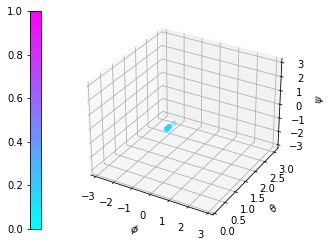

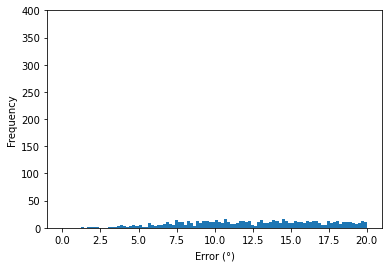

integrated (averaged) density = 1.0000000000004547
2022-03-17 05:15:53,948 INFO MSE deviation of the 2:th estimated GD-refined rotations using register_rotations : 1.0349832813581124


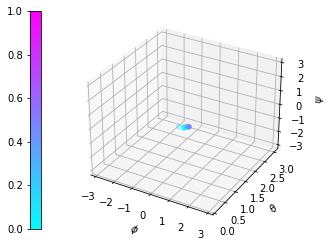

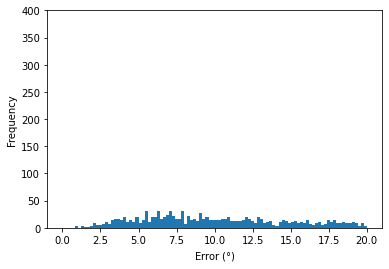

integrated (averaged) density = 0.9999999999999432
2022-03-17 05:15:55,599 INFO MSE deviation of the 3:th estimated GD-refined rotations using register_rotations : 0.19199858058428712


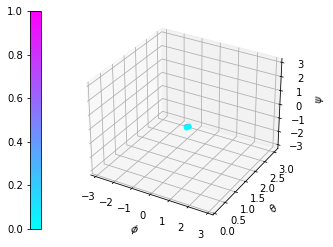

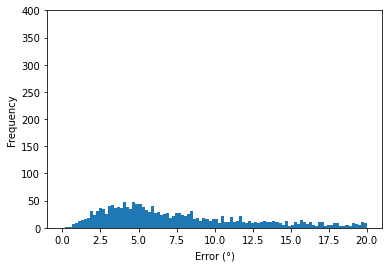

integrated (averaged) density = 1.0000000000000142
2022-03-17 05:15:56,918 INFO MSE deviation of the 4:th estimated GD-refined rotations using register_rotations : 0.023650322772293803


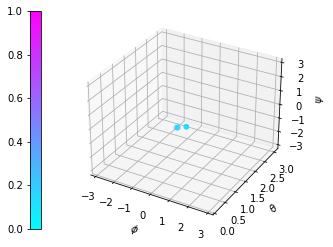

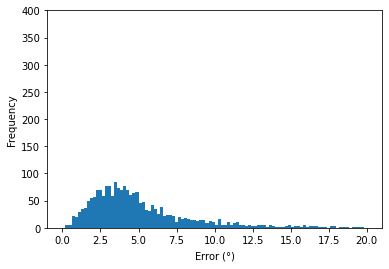

integrated (averaged) density = 0.9999999999999858
2022-03-17 05:15:58,271 INFO MSE deviation of the 5:th estimated GD-refined rotations using register_rotations : 0.0069335760160534965


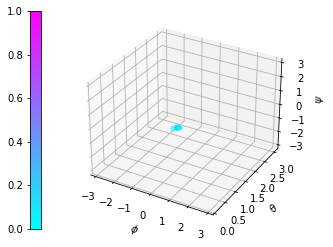

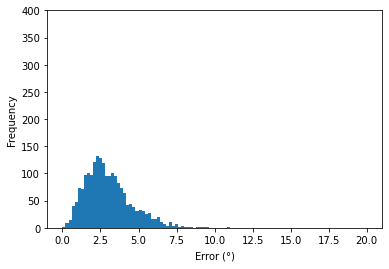

integrated (averaged) density = 1.0000000000000426
2022-03-17 05:15:59,639 INFO MSE deviation of the 6:th estimated GD-refined rotations using register_rotations : 0.003195494356534742


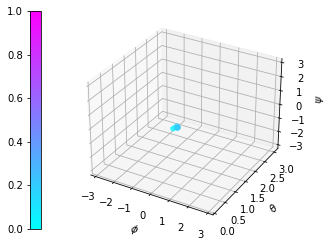

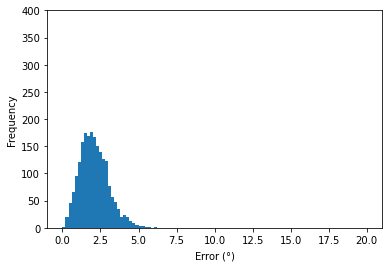

integrated (averaged) density = 0.9999999999999716
2022-03-17 05:16:01,055 INFO MSE deviation of the 7:th estimated GD-refined rotations using register_rotations : 0.0019522978248647923


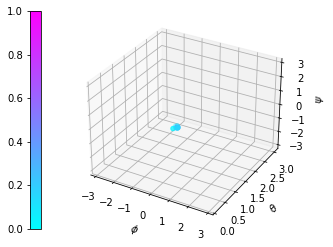

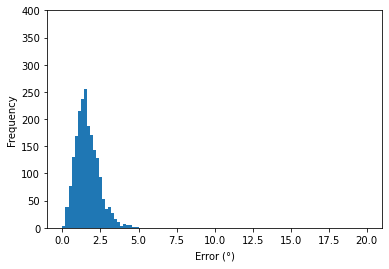

integrated (averaged) density = 1.0000000000000497
2022-03-17 05:16:02,518 INFO MSE deviation of the 8:th estimated GD-refined rotations using register_rotations : 0.001454566748299825


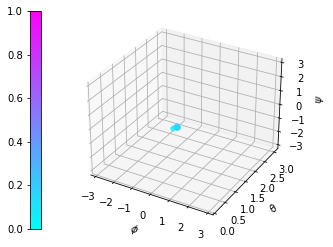

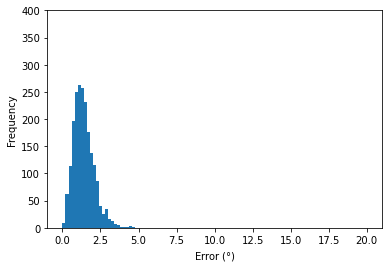

integrated (averaged) density = 0.9999999999999645
2022-03-17 05:16:03,901 INFO MSE deviation of the 9:th estimated GD-refined rotations using register_rotations : 0.0012444002048000666


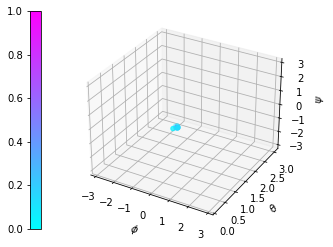

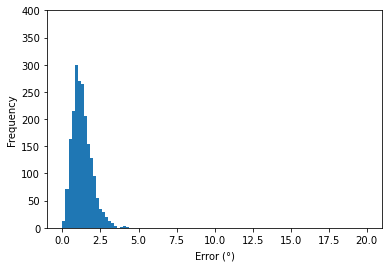

integrated (averaged) density = 1.0000000000000355
2022-03-17 05:16:05,508 INFO MSE deviation of the 10:th estimated GD-refined rotations using register_rotations : 0.0011565224061605992


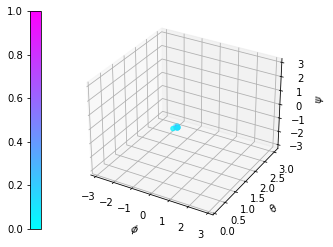

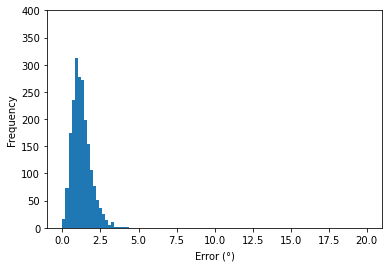

integrated (averaged) density = 1.0000000000000142
2022-03-17 05:16:06,869 INFO MSE deviation of the 11:th estimated GD-refined rotations using register_rotations : 0.0011216946493778639


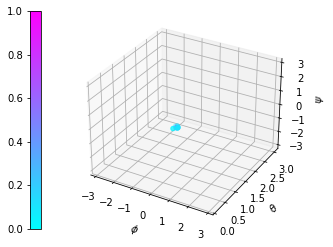

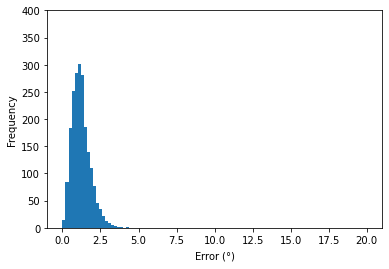

integrated (averaged) density = 1.0000000000000355
2022-03-17 05:16:08,200 INFO MSE deviation of the 12:th estimated GD-refined rotations using register_rotations : 0.0011050256781255574


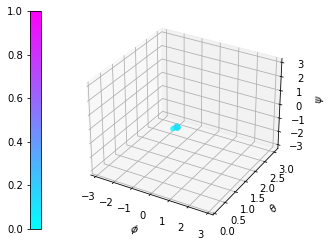

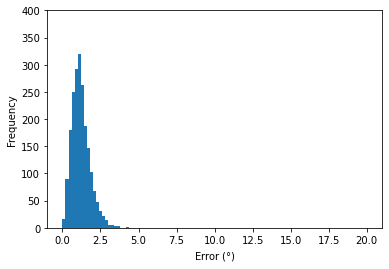

integrated (averaged) density = 0.9999999999999503
2022-03-17 05:16:09,593 INFO MSE deviation of the 13:th estimated GD-refined rotations using register_rotations : 0.0010970557381286285


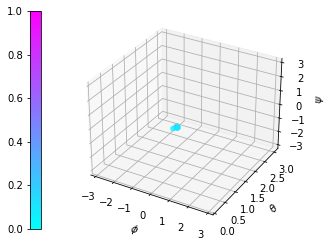

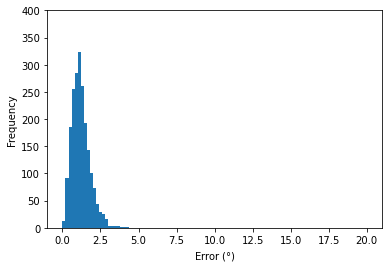

integrated (averaged) density = 0.9999999999999858
2022-03-17 05:16:10,994 INFO MSE deviation of the 14:th estimated GD-refined rotations using register_rotations : 0.0010922252572548219


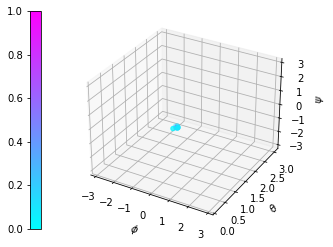

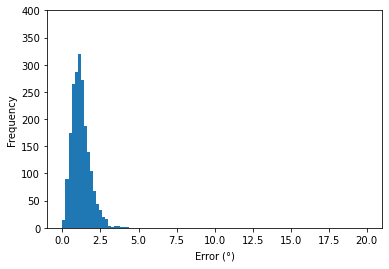

integrated (averaged) density = 0.9999999999999858
2022-03-17 05:16:12,382 INFO MSE deviation of the 15:th estimated GD-refined rotations using register_rotations : 0.0010887955303150163


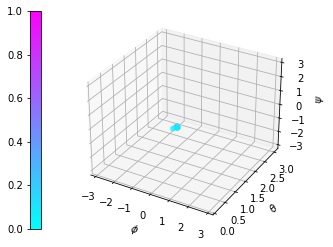

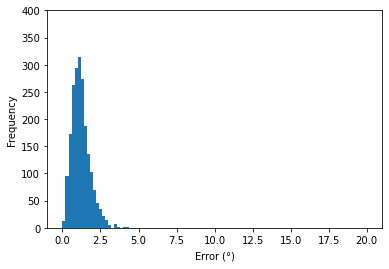

integrated (averaged) density = 1.000000000000007
2022-03-17 05:16:13,829 INFO MSE deviation of the 16:th estimated GD-refined rotations using register_rotations : 0.0010865808380645704


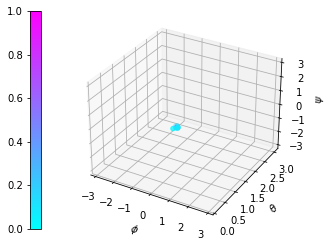

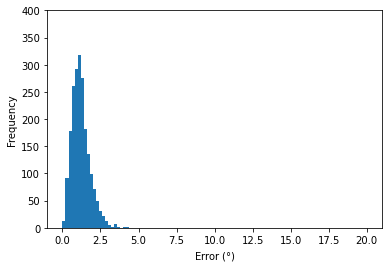

integrated (averaged) density = 1.0
2022-03-17 05:16:15,262 INFO MSE deviation of the 17:th estimated GD-refined rotations using register_rotations : 0.0010851997639924045


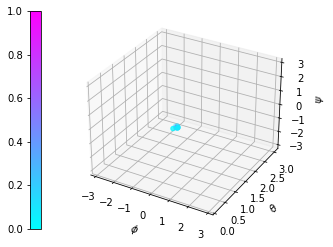

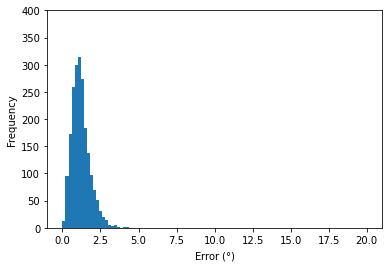

integrated (averaged) density = 0.9999999999999929
2022-03-17 05:16:16,628 INFO MSE deviation of the 18:th estimated GD-refined rotations using register_rotations : 0.00108415206746244


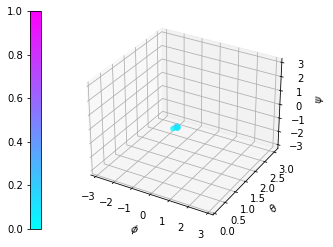

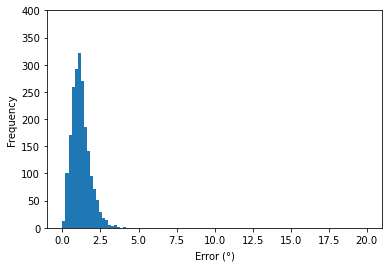

integrated (averaged) density = 1.0000000000000142
2022-03-17 05:16:18,146 INFO MSE deviation of the 19:th estimated GD-refined rotations using register_rotations : 0.0010831878151767397


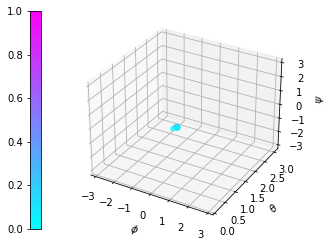

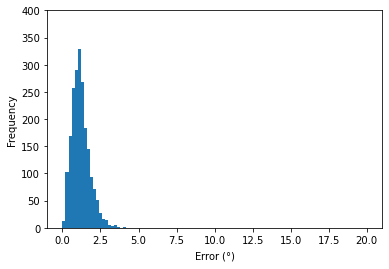

integrated (averaged) density = 1.0000000000000284
2022-03-17 05:16:19,798 INFO MSE deviation of the 20:th estimated GD-refined rotations using register_rotations : 0.0010822745423152464


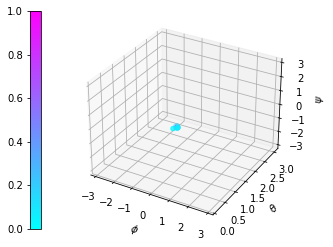

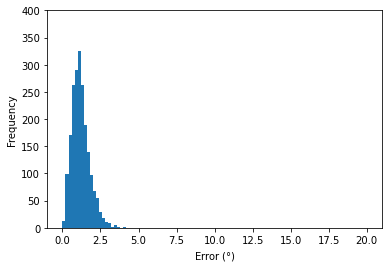

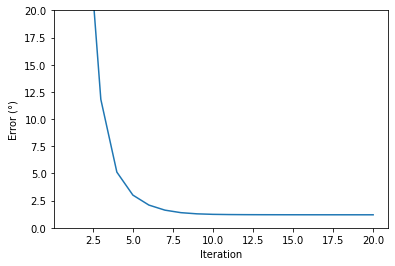

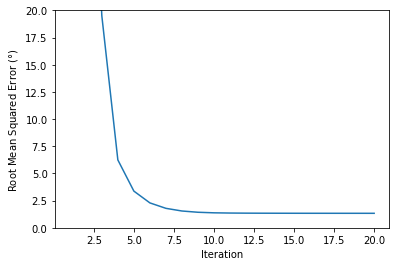

In [5]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
                mr_repeat=mr_repeat,
                hist_drange=20,
                hist_vrange=400,
#                 results_folder=results_path #?
                )
